# Разведочный анализ с использованием `pandas`

In [2]:
# Добавлние бибилиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

Данные(dataset) лежат на гите в папке data/Churn_Modelling.csv

In [3]:
#df = pd.read_csv('D:/Git/ml_data.mining/data/', encoding = "ISO-8859-1", index_col=0) 
df = pd.read_csv('D:/Git/ml_data.mining/data/Churn_Modelling.csv')
#df = pd.read_csv('D:/Git/ml_data.mining/data/indian_liver_patient.csv')

<h3>Постановка задачи: Прогноз оттока клиентов банка

In [4]:
df.head()

RowNumber  CustomerId   Surname  CreditScore Geography  Gender   Age  \
0          1    15634602  Hargrave          619    France  Female  42.0   
1          2    15647311      Hill          608     Spain  Female  41.0   
2          3    15619304      Onio          502    France  Female  42.0   
3          4    15701354      Boni          699    France  Female  39.0   
4          5    15737888  Mitchell          850     Spain  Female  43.0   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1        1.0             1.0   
1       1   83807.86              1        0.0             1.0   
2       8  159660.80              3        1.0             0.0   
3       1       0.00              2        0.0             0.0   
4       2  125510.82              1        NaN             1.0   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         79084.10       0

Информация о столбиках данных:
1. **RowNumber**: номер строки
2. **CustomerId**: уникальный идентификатор для каждого клиента
3. **Surname**: фамилия клиента
4. **CreditScore**: кредитный рейтинг клиента
5. **Geography**: страна проживания клиента (France, Spain или Germany)
6. **Gender**: пол (Male, Female)
7. **Age**: возраст
8. **Tenure**: количество лет нахождение в банке
9. **Balance**: баланс счета
9. **NumOfProducts**: количество банковских продуктов, которые использует клиент
9. **HasCrCard**: кредитная карта (1 = да, 0 = нет)
9. **IsActiveMember**: является ли клиент активным участником (1 = да, 0 = нет)
9. **EstimatedSalary**: зарплата клиента
9. **Exited**: ушел ли клиент (1 = да, 0 = нет)


In [5]:
df.describe()

RowNumber    CustomerId   CreditScore           Age        Tenure  \
count  10002.000000  1.000200e+04  10002.000000  10001.000000  10002.000000   
mean    5001.499600  1.569093e+07    650.555089     38.922311      5.012498   
std     2887.472338  7.193177e+04     96.661615     10.487200      2.891973   
min        1.000000  1.556570e+07    350.000000     18.000000      0.000000   
25%     2501.250000  1.562852e+07    584.000000     32.000000      3.000000   
50%     5001.500000  1.569073e+07    652.000000     37.000000      5.000000   
75%     7501.750000  1.575323e+07    718.000000     44.000000      7.000000   
max    10000.000000  1.581569e+07    850.000000     92.000000     10.000000   

             Balance  NumOfProducts     HasCrCard  IsActiveMember  \
count   10002.000000   10002.000000  10001.000000    10001.000000   
mean    76491.112875       1.530194      0.705529        0.514949   
std     62393.474144       0.581639      0.455827        0.499801   
min         0.000000       1.000000      0.000000        0.000000   
25%         0.000000       1.000000      0.000000        0.000000   
50%     97198.540000       1.000000      1.000000        1.000000   
75%    127647.840000       2.000000      1.000000        1.000000   
max    250898.090000       4.000000      1.000000        1.000000   

       EstimatedSalary        Exited  
count     10002.000000  10002.000000  
mean     100083.331145      0.203759  
std       57508.117802      0.402812  
min          11.580000      0.000000  
25%       50983.750000      0.000000  
50%      100185.240000      0.000000  
75%      149383.652500      0.000000  
max      199992.480000      1.000000

Анализ нечисловых данных

In [6]:
df.describe(include=['O'])

Surname Geography Gender
count    10002     10001  10002
unique    2932         3      2
top      Smith    France   Male
freq        32      5014   5458

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10002 entries, 0 to 10001
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10002 non-null  int64  
 1   CustomerId       10002 non-null  int64  
 2   Surname          10002 non-null  object 
 3   CreditScore      10002 non-null  int64  
 4   Geography        10001 non-null  object 
 5   Gender           10002 non-null  object 
 6   Age              10001 non-null  float64
 7   Tenure           10002 non-null  int64  
 8   Balance          10002 non-null  float64
 9   NumOfProducts    10002 non-null  int64  
 10  HasCrCard        10001 non-null  float64
 11  IsActiveMember   10001 non-null  float64
 12  EstimatedSalary  10002 non-null  float64
 13  Exited           10002 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 1.1+ MB


## Просмотр и заполнение пропусков

In [8]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          1
Gender             0
Age                1
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          1
IsActiveMember     1
EstimatedSalary    0
Exited             0
dtype: int64

т.к. мы имеем маленькое кол-во пропусков, а точнее 1 пропуск в каждом столбике, то зададим им медианной значение, ведь от этого много чего не поменятеся.

В столбике Geography, вставим самую популярную страну, которая у нас есть

In [9]:
df.Geography.describe()

count      10001
unique         3
top       France
freq        5014
Name: Geography, dtype: object

In [10]:
df[df.Geography.isnull()]

RowNumber  CustomerId   Surname  CreditScore Geography Gender   Age  \
6          7    15592531  Bartlett          822       NaN   Male  50.0   

   Tenure  Balance  NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  \
6       7      0.0              2        1.0             1.0          10062.8   

   Exited  
6       0

In [11]:
df['Age'].sort_values().unique()

array([18.  , 19.  , 20.  , 21.  , 22.  , 23.  , 24.  , 25.  , 26.  ,
       27.  , 28.  , 29.  , 30.  , 31.  , 32.  , 32.34, 33.  , 34.  ,
       35.  , 36.  , 36.44, 37.  , 38.  , 39.  , 40.  , 41.  , 42.  ,
       43.  , 44.  , 45.  , 45.25, 46.  , 47.  , 48.  , 49.  , 50.  ,
       51.  , 52.  , 53.  , 54.  , 55.  , 56.  , 57.  , 58.  , 59.  ,
       60.  , 61.  , 62.  , 63.  , 64.  , 65.  , 66.  , 67.  , 68.  ,
       69.  , 70.  , 71.  , 72.  , 73.  , 74.  , 75.  , 76.  , 77.  ,
       78.  , 79.  , 80.  , 81.  , 82.  , 83.  , 84.  , 85.  , 88.  ,
       92.  ,   nan])

In [12]:
df.Age.describe()

count    10001.000000
mean        38.922311
std         10.487200
min         18.000000
25%         32.000000
50%         37.000000
75%         44.000000
max         92.000000
Name: Age, dtype: float64

In [13]:
df.HasCrCard.describe()

count    10001.000000
mean         0.705529
std          0.455827
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: HasCrCard, dtype: float64

In [14]:
df.IsActiveMember.describe()

count    10001.000000
mean         0.514949
std          0.499801
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: IsActiveMember, dtype: float64

In [15]:
df.Geography.fillna('France', inplace=True)

C:\Users\kanze\AppData\Local\Temp\ipykernel_2648\3733742357.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.Geography.fillna('France', inplace=True)


In [16]:
df.Age = df.Age.fillna(df.Age.median())
df.Age.describe()

count    10002.000000
mean        38.922119
std         10.486693
min         18.000000
25%         32.000000
50%         37.000000
75%         44.000000
max         92.000000
Name: Age, dtype: float64

In [ ]:
df.HasCrCard = df.HasCrCard.fillna(df.HasCrCard.median())
df.HasCrCard.describe()

count    10002.000000
mean         0.709158
std          0.582632
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max         37.000000
Name: HasCrCard, dtype: float64

In [ ]:
df.IsActiveMember = df.IsActiveMember.fillna(df.IsActiveMember.median())
df.IsActiveMember.describe()

count    10002.000000
mean         0.518596
std          0.618762
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max         37.000000
Name: IsActiveMember, dtype: float64

## Визуализация распределения и взаимосвязей

Для визуализации воспользуемся библиотекой `matplotlib`. Построим гистограмму, демонстрирующую количество выживших в этом наборе данных.

<Axes: xlabel='Exited', ylabel='count'>

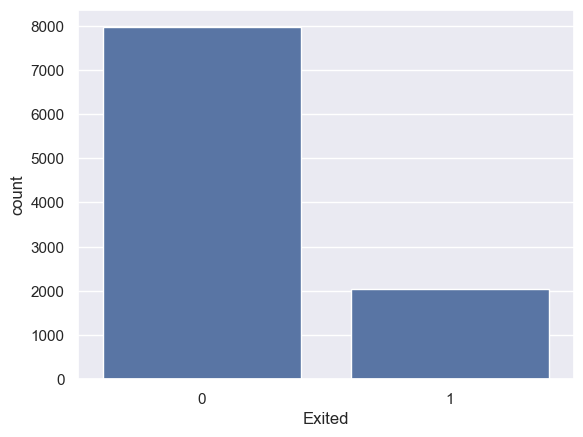

In [19]:
sns.countplot(x=df['Exited'])

<Axes: xlabel='Tenure', ylabel='count'>

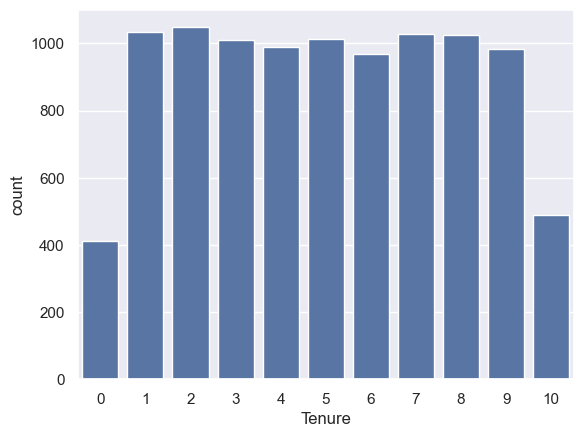

In [20]:
sns.countplot(x=df['Tenure'])

<Axes: xlabel='Gender', ylabel='count'>

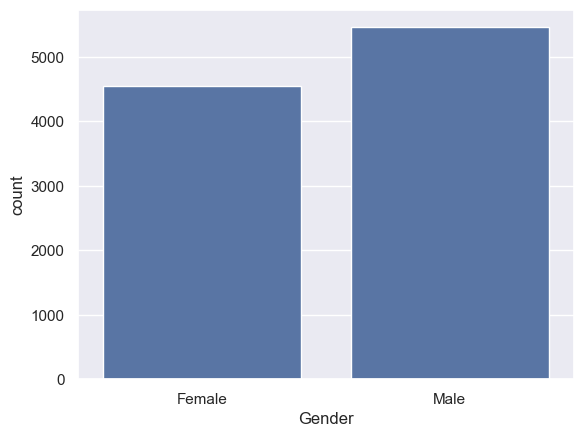

In [21]:
sns.countplot(x=df['Gender'])

<Axes: xlabel='Geography', ylabel='count'>

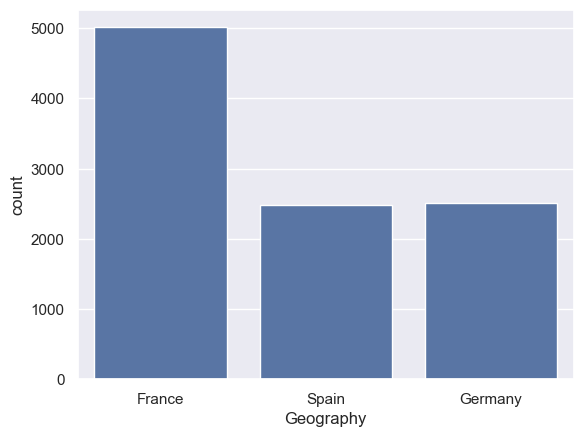

In [22]:
sns.countplot(x=df['Geography'])

<Axes: xlabel='Geography', ylabel='count'>

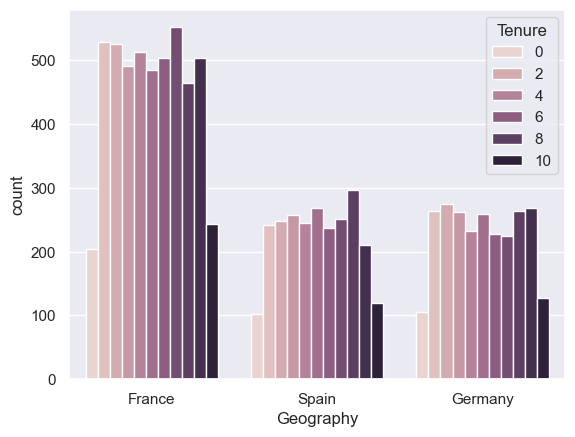

In [23]:
sns.countplot(data=df, x=df['Geography'], hue='Tenure')

На графе видно, что очень много клиентов уходит в осознаном возрасте (среднем возрасте 2 периода).
Молодые люди предпочитают остаться с в данном банке,  люди среднего возраста (среднего возраста 1 периода), а так же старческом возрасте. 

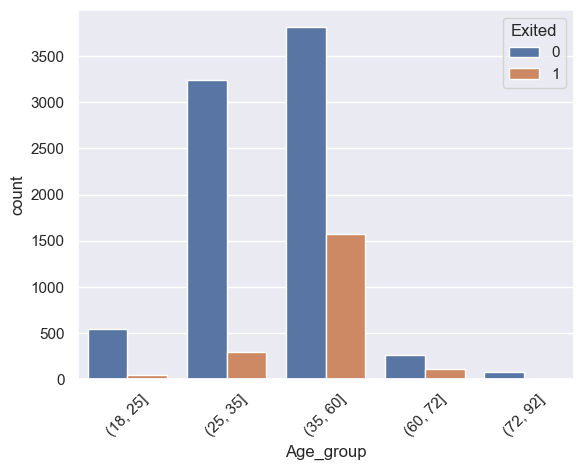

In [24]:
df["Age_group"] = pd.cut(x=df['Age'], bins=[18, 25, 35, 60, 72, 92])
plt.xticks(rotation=45)
sns.countplot(data=df, hue='Exited', x='Age_group');

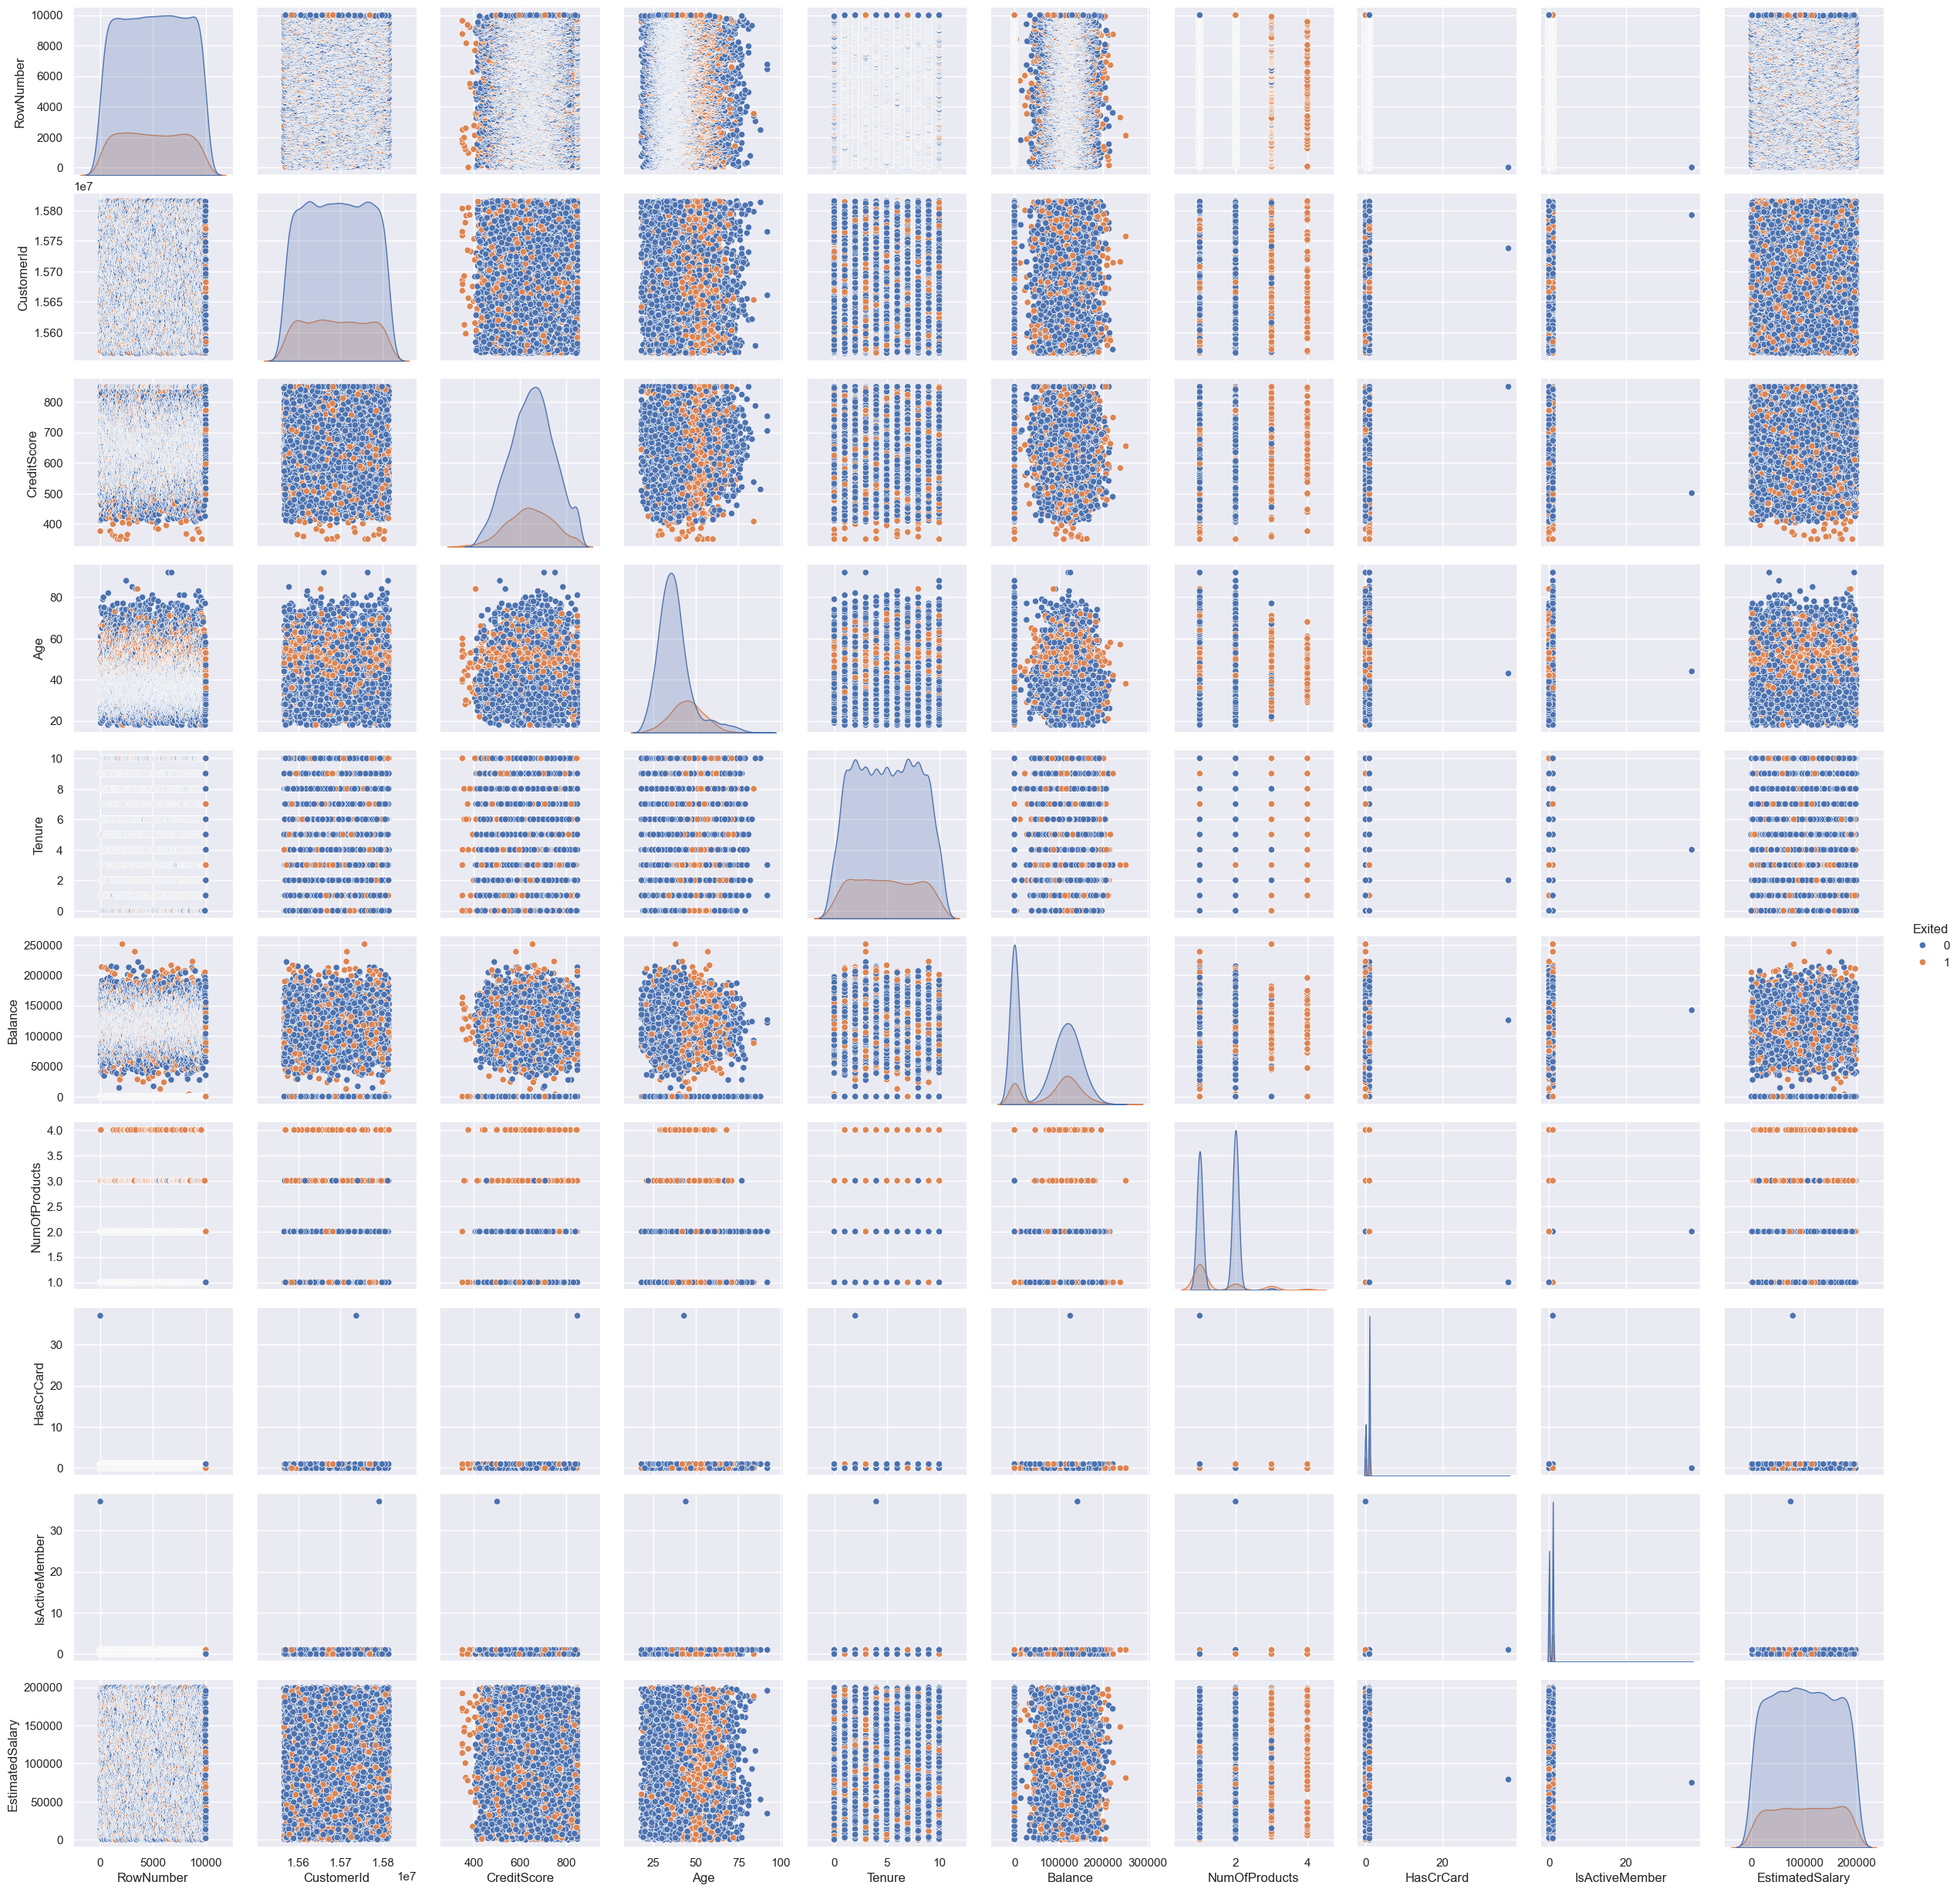

In [25]:
sns.pairplot(df, kind="scatter", hue="Exited");

## Нормализация

Алгоритмы машинного обучения, как правило, работают лучше или сходятся быстрее, когда различные функции (переменные) имеют меньший масштаб. Поэтому перед обучением на них моделей машинного обучения данные обычно нормализуются.

1. Мин-макс нормализация преобразует каждое значение данных в значение от 0 до 1

$$x_{norm}=\frac{x-x_{min}}{x_{max}-x_{min}}$$

2. Средняя нормализация масштабирует значения таким образом, чтобы среднее значение всех значений было равно 0, а стандартное отклонение (дисперсия) -  1.

$$x_{norm}=\frac{x-x_{mean}}{x_{std}}$$

Проведем нормализацию значений возраста и стоимости билета.
Нормализацию можно провести вручную с использованием приведенных выше формул, а можно воспользоваться инструментами библиотеки `scikit-learn.preprocessing`

Для разных моделей нужна разная нормализация: для метрических моделей (например, KNN) нужна минимакс нормализация, а для линейных (например, SVM) z-нормализация (стандартизация). https://scikit-learn.org/stable/modules/preprocessing.html

И снова построим график зависимости.

In [27]:
from sklearn.preprocessing import MinMaxScaler  # StandardScaler

scaler_mm = MinMaxScaler()

df[['mmAge', 'mmCreditScore', 'mmBalance', 'mmEstimatedSalary']] = scaler_mm.fit_transform(df[['Age', 'EstimatedSalary', 'CreditScore', 'Balance']])
df.head()

RowNumber  CustomerId   Surname  CreditScore Geography  Gender   Age  \
0          1    15634602  Hargrave          619    France  Female  42.0   
1          2    15647311      Hill          608     Spain  Female  41.0   
2          3    15619304      Onio          502    France  Female  42.0   
3          4    15701354      Boni          699    France  Female  39.0   
4          5    15737888  Mitchell          850     Spain  Female  43.0   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1        1.0             1.0   
1       1   83807.86              1        0.0             1.0   
2       8  159660.80              3        1.0             0.0   
3       1       0.00              2        0.0             0.0   
4       2  125510.82              1       37.0             1.0   

   EstimatedSalary  Exited Age_group     mmAge  mmCreditScore  mmBalance  \
0        101348.88       1  (35, 60]  0.324324       0.506735      0.538   
1        112542.58       0  (35, 60]  0.310811       0.562709      0.516   
2        113931.57       1  (35, 60]  0.324324       0.569654      0.304   
3         93826.63       0  (35, 60]  0.283784       0.469120      0.698   
4         79084.10       0  (35, 60]  0.337838       0.395400      1.000   

   mmEstimatedSalary  
0           0.000000  
1           0.334031  
2           0.636357  
3           0.000000  
4           0.500246

Строим график зависимости зарплаты и возраста

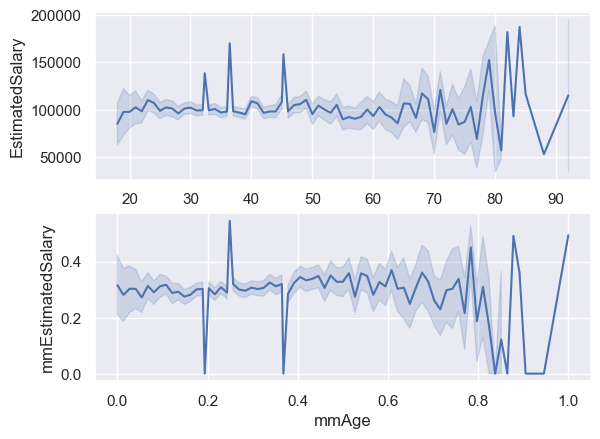

In [28]:
_, axs = plt.subplots(nrows=2)
sns.lineplot(data=df, x='Age', y='EstimatedSalary', ax=axs[0])
sns.lineplot(data=df, x='mmAge', y='mmEstimatedSalary', ax=axs[1]);

## Кодирование категориальных признаков

`OrdinalEncoder` и `OneHotEncoder` - часть библиотеки `scikit-learn` в Python и используются для преобразования категориальных или текстовых признаков в числа, которые предсказательные модели понимают лучше.

`sklearn.preprocessing.OrdinalEncoder` раздает категориальным признакам значения от 0 до $n$, где $n$ - это количество различных значений в данном столбце. Это может быть неправильно, так как может запутать модель машинного обучения, наложив на значения числовой порядок.

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OrdinalEncoder.html

In [29]:
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()
df[['Geography', 'Gender']] = enc.fit_transform(df[['Geography', 'Gender']])
df.head()

RowNumber  CustomerId   Surname  CreditScore  Geography  Gender   Age  \
0          1    15634602  Hargrave          619        0.0     0.0  42.0   
1          2    15647311      Hill          608        2.0     0.0  41.0   
2          3    15619304      Onio          502        0.0     0.0  42.0   
3          4    15701354      Boni          699        0.0     0.0  39.0   
4          5    15737888  Mitchell          850        2.0     0.0  43.0   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1        1.0             1.0   
1       1   83807.86              1        0.0             1.0   
2       8  159660.80              3        1.0             0.0   
3       1       0.00              2        0.0             0.0   
4       2  125510.82              1       37.0             1.0   

   EstimatedSalary  Exited Age_group     mmAge  mmCreditScore  mmBalance  \
0        101348.88       1  (35, 60]  0.324324       0.506735      0.538   
1        112542.58       0  (35, 60]  0.310811       0.562709      0.516   
2        113931.57       1  (35, 60]  0.324324       0.569654      0.304   
3         93826.63       0  (35, 60]  0.283784       0.469120      0.698   
4         79084.10       0  (35, 60]  0.337838       0.395400      1.000   

   mmEstimatedSalary  
0           0.000000  
1           0.334031  
2           0.636357  
3           0.000000  
4           0.500246

In [30]:
enc.categories_

[array(['France', 'Germany', 'Spain'], dtype=object),
 array(['Female', 'Male'], dtype=object)]

## Корреляция

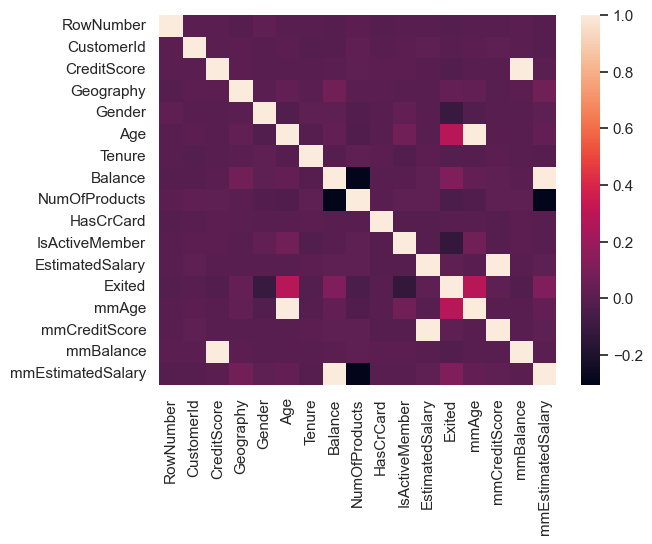

In [31]:
sns.heatmap(df.corr(numeric_only = True));

## Вывод
В результате данной работы был проведен анализ датасета, построены графики и тепловая карта.

Был выбран датасет, сформулирована постановка задачи, проведена нормализация данных, кодирование категориальных признаков и корреляция. 

Постановка задачи: Прогноз оттока клиентов банка  
Нормализация данных столбцов: 'Age', 'EstimatedSalary', 'CreditScore', 'Balance'  
Кодирование категориальных признаков: 'Geography', 'Gender'
И построение тепловой карты, на которой видно, что большинство столбцов не коррелирует друг с другом, но есть и такие, которые коррелируют очень сильно.